In [1]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tweepy
import time
import json
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from configTweet import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Twitter Accounts
target_terms = ("@BBC", "@CBS", "@CNN", "@FOXNEWS", "@NYTIMES")


# Filter out non-human activity
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"







  # Create array to hold sentiment
sentiments = []

counter = 1

# Loop through target accounts
for target in target_terms:
    oldest_tweet = None
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    # Loop through range to obtain the last 100 tweets by each account
    for loop in range(4):
        public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            # Utilize the non-human filters
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang):
                
                #Run VADER Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter
                
                # Push to each array
                compound_list.append(compound)
                positive_list.append(pos)
                neutral_list.append(neu)
                negative_list.append(neg)
                
                # Set oldest tweet value
                oldest_tweet = int(tweet["id_str"]) - 1
                
                # Create a sentiments dictionary
                sentiments.append({"User": target,
                                   "Tweet": tweet["text"],
                                   "Date": tweet["created_at"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
                # Add to counter
                counter = counter+1
                
                
                
                
                
    

In [3]:

# Convert sentiments to dataframe
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,0.0000,Thu Oct 04 23:05:06 +0000 2018,0.000,1.000,0.000,@BBC 😂😂,1,@BBC
1,0.1759,Thu Oct 04 23:04:53 +0000 2018,0.184,0.595,0.221,RT @BBC: The pika might just be the world's cu...,2,@BBC
2,0.0000,Thu Oct 04 23:04:43 +0000 2018,0.000,1.000,0.000,RT @BBC: This is how homophobia feels in 2018....,3,@BBC
3,0.1759,Thu Oct 04 23:04:26 +0000 2018,0.184,0.595,0.221,RT @BBC: The pika might just be the world's cu...,4,@BBC
4,0.1759,Thu Oct 04 23:04:13 +0000 2018,0.184,0.595,0.221,RT @BBC: The pika might just be the world's cu...,5,@BBC


In [4]:

# Split the sentiments_pd dataframe into smaller dataframes 
bbc_df = sentiments_pd.loc[sentiments_pd['User']=='@BBC', :].reset_index(drop=True).head(100)
cbs_df = sentiments_pd.loc[sentiments_pd['User']=='@CBS', :].reset_index(drop=True).head(100) 
cnn_df = sentiments_pd.loc[sentiments_pd['User']=='@CNN', :].reset_index(drop=True) .head(100)
fox_df = sentiments_pd.loc[sentiments_pd['User']=='@FOXNEWS', :].reset_index(drop=True).head(100) 
nyt_df = sentiments_pd.loc[sentiments_pd['User']=='@NYTIMES', :].reset_index(drop=True).head(100)

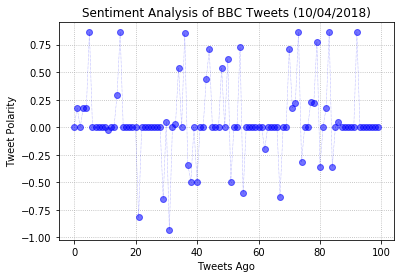

In [5]:
# Create scatter plot for BBC sentiment analysis
plt.plot(np.arange(len(bbc_df["Compound"])),
         bbc_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.55, color='b', linestyle=':')
plt.title("Sentiment Analysis of BBC Tweets (10/04/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("BBC_Sentiment.png")
plt.show()

In [6]:
#output files
csv_outfile="news_tweets.csv"
scatter=["scatter_Plot_1.png","scatter_Plot_2.png","scatter_Plot_3.png","scatter_Plot_4.png","scatter_Plot_5.png"]
bargraph="bar_graph.png"
